# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Exploratory Data Analysis

### Libraries required

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [249]:
columns = {
    "age": {'meaning': 'age in years',
            'num': 3},
    "sex": {'meaning': 'sex (1 = male; 0 = female)',
            'num': 4},
    "cp": {'meaning': 'chest pain type 1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic',
           'num': 9},
    "trestbps": {'meaning': 'resting blood pressure (in mm Hg on admission to the hospital)',
                 'num': 10},
    "chol": {'meaning': 'serum cholestoral in mg/dl',
             'num': 12},
    "fbs": {'meaning': '(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)',
            'num': 16},
    "restecg": {'meaning': 'resting electrocardiographic results 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes criteria',
                'num': 19},
    "thalach": {'meaning': 'maximum heart rate achieved',
                'num': 32},
    "exang": {'meaning': 'exercise induced angina (1 = yes; 0 = no)',
              'num': 38},
    "oldpeak": {'meaning': 'ST depression induced by exercise relative to rest',
                'num': 40},
    "slope": {'meaning': 'the slope of the peak exercise ST segment 1: upsloping; 2: flat; 3: downsloping',
              'num': 41},
    "ca": {'meaning': 'number of major vessels (0-3) colored by flourosopy',
           'num': 44},
    "thal": {'meaning': '3 = normal; 6 = fixed defect; 7 = reversable defect',
             'num': 51},
    "num": {'meaning': 'diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing; 1: > 50% diameter narrowing',
            'num': 58},
}

df = pd.read_csv("Data/processed.cleveland.data", names=[i for i in columns.keys()])

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160,286,0,2,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120,229,0,2,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130,250,0,0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130,204,0,2,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68,1,4,144,193,1,0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57,1,4,130,131,0,0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57,0,2,130,236,0,2,174.0,0.0,0.0,2.0,1.0,3.0,1


### Understand the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


No hay datos nulos o datos faltantes a priori, sin embargo, se verificará este supuesto con cada variable.

#### Age

Esta variable se encuentra en años y puede tomar cualquier valor entero positivo

In [17]:
df.age.describe()

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [243]:
rango = tuple(i for i in range(int(df.age.min()), int(df.age.max())+1))
df.query(f'age not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 29, 77 ]$ para la edad de la persona

##### Histogram

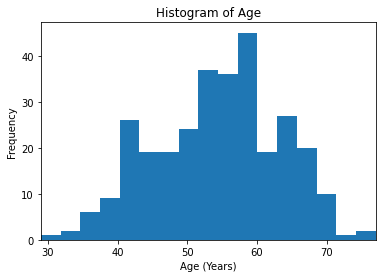

In [6]:
bins= int(len(df)**(1/2))
ax = df.age.plot(kind='hist', xlim=[29,77], bins=bins)
ax.set_xlabel('Age (Years)')
ax.set_title('Histogram of Age')
plt.show()

##### Density Plot

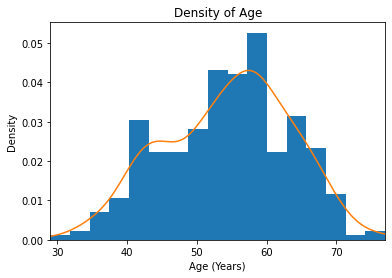

In [7]:
bins= int(len(df)**(1/2))
ax = df.age.plot.hist(density=True, xlim=[29,77], bins=bins)
df.age.plot.density(ax=ax)
ax.set_xlabel('Age (Years)')
ax.set_title('Density of Age')
plt.show()

Los datos de edad no se encuentran uniformemente distribuidos, presenta cierta forma de campana alrededor de los 50 y los 60 años. El dato mínimo de la edad es de 29 por lo que no se tienen datos de población joven. El dato máximo de la edad es de 77 por lo que no se tienen datos de población más mayor.

##### Boxplot

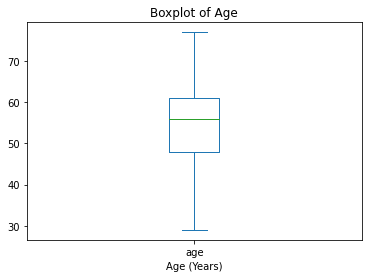

In [18]:
ax = df.age.plot.box()
ax.set_xlabel('Age (Years)')
ax.set_title('Boxplot of Age')
plt.show()

**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` se determina que no existen valores atípicos.

##### Violin Plot

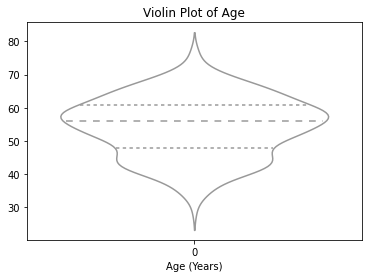

In [49]:
ax = sns.violinplot(df.age,
                    inner='quartile', color='white')
ax.set_xlabel('Age (Years)')
# ax.set_ylabel('')
ax.set_title('Violin Plot of Age')
plt.show()

#### Sex

Esta variable puede tomar dos valores:

- 0: Mujer
- 1: Hombre

In [240]:
df.query('sex not in (0, 1)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1\}$ para el sexo de la persona

In [259]:
bar = df.groupby('sex').agg(count = ('sex', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
sex,,
0,97,0.320132
1,206,0.679868


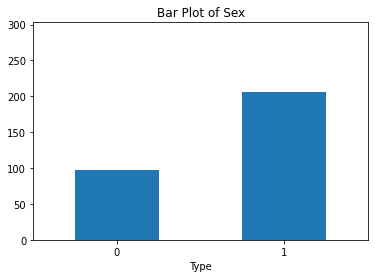

In [260]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, 303], legend=False)
ax.set_title('Bar Plot of Sex')
ax.set_xlabel('Type')
plt.show()

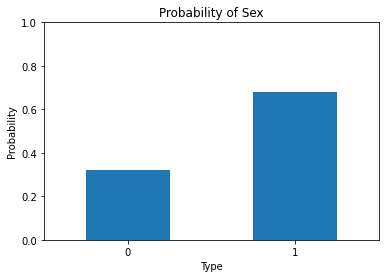

In [261]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Sex')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de sexo no se encuentran uniformemente distribuidos, alrededor de 2/3 de los datos son de hombres.

#### Chest Pain

Esta variable puede tomar 4 valores:

- 1: Angina Típica
- 2: Angina Atípica
- 3: Dolor de pecho no anginal
- 4: Asintomático

In [56]:
df.query('cp not in (1, 2, 3, 4)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{ 1, 2, 3, 4 \}$ para el dolor de pecho de la persona.

In [101]:
bar = df.groupby('cp').agg(count=('cp', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
cp,,
1,23,0.075908
2,50,0.165017
3,86,0.283828
4,144,0.475248


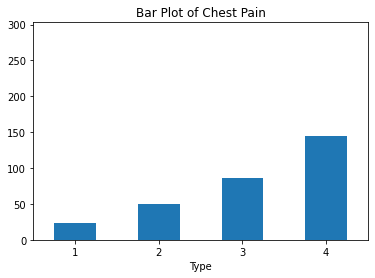

In [102]:
ax = bar['count'].plot.bar(legend=False, ylim=[0, 303])
ax.set_title('Bar Plot of Chest Pain')
ax.set_xlabel('Type')
plt.xticks(rotation=0)
plt.show()

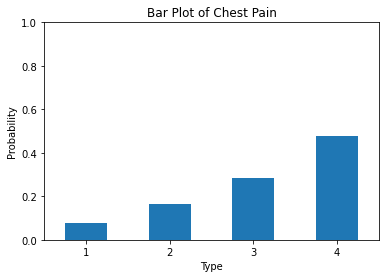

In [94]:
ax = bar.prob.plot.bar(legend=False, ylim=[0,1])
ax.set_title('Probability of Chest Pain')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.xticks(rotation=0)
plt.show()

Los datos de Chest Pain no se encuentran uniformemente distribuidos.

- Casi la mitad de los datos son de personas asíntomaticas (48%).
- El 28% corresponde a personas con dolor de pecho no anginal.
- Las personas con angina atípica son el 16% de los datos.
- El 8% de las personas tienen angina típica.

#### Resting Blood Pressure

Esta variable se encuentra en mm Hg y puede tomar valores enteros positivos.

In [134]:
df.trestbps.describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [244]:
rango = tuple(i for i in range(int(df.trestbps.min()), int(df.trestbps.max())+1))
df.query(f'trestbps not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 94, 200 ]$ para la presión de la sangre en reposo.

##### Histogram

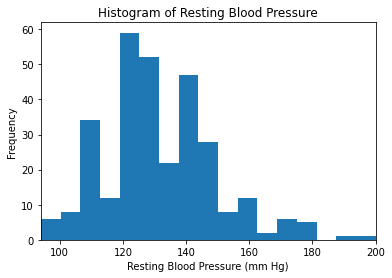

In [227]:
bins= int(len(df)**(1/2))
ax = df.trestbps.plot(kind='hist', xlim=[94, 200], bins=bins)
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Histogram of Resting Blood Pressure')
plt.show()

##### Density Plot

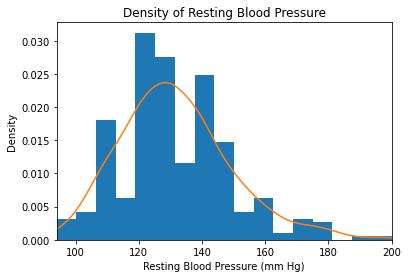

In [228]:
bins= int(len(df)**(1/2))
ax = df.trestbps.plot.hist(density=True, xlim=[94, 200], bins=bins)
df.trestbps.plot.density(ax=ax)
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Density of Resting Blood Pressure')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana alrededor de 130 mm Hg. 
El dato mínimo es de 94. El dato máximo es de 200.

##### Boxplot

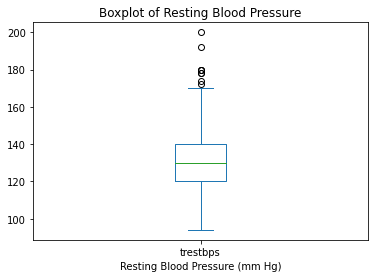

In [229]:
ax = df.trestbps.plot.box()
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Boxplot of Resting Blood Pressure')
plt.show()

In [206]:
qu1 = df.trestbps.describe()['25%']
qu3 = df.trestbps.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'trestbps < ({qu1} - {variacion}) or trestbps > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
14,52,1,3,172,199,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
83,68,1,3,180,274,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3
126,56,0,4,200,288,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3
172,59,0,4,174,249,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
183,59,1,1,178,270,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0
188,54,1,2,192,283,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
201,64,0,4,180,325,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
213,66,0,4,178,228,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3
231,55,0,4,180,327,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0,2


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

##### Violin Plot

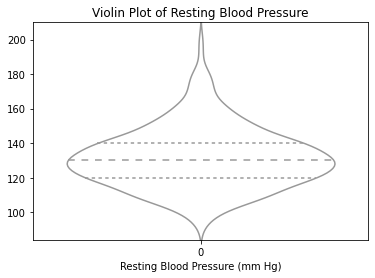

In [155]:
ax = sns.violinplot(df.trestbps, inner='quartile', color='white')
ax.set_xlabel('Resting Blood Pressure (mm Hg)')
ax.set_title('Violin Plot of Resting Blood Pressure')
plt.show()

#### Serum Cholesterol

Esta variable se encuentra en mg/dl y puede tomar valores enteros positivos.

In [170]:
df.chol.describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

In [182]:
rango = tuple(i for i in range(126, 564+1))
df.query(f'chol not in {rango}')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $[ 126, 564 ]$ para los niveles de coleterol

##### Histogram

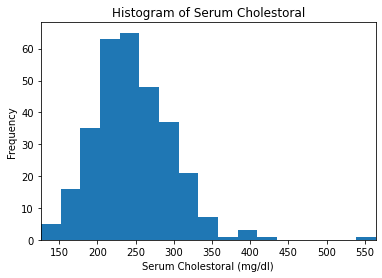

In [226]:
bins= int(len(df)**(1/2))
ax = df.chol.plot(kind='hist', xlim=[126, 564], bins=bins)
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Histogram of Serum Cholestoral')
plt.show()

##### Density Plot

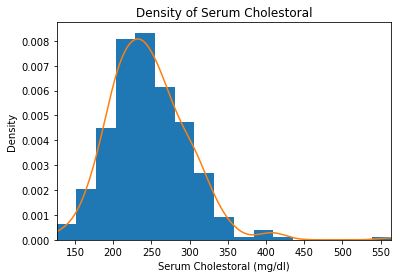

In [225]:
bins= int(len(df)**(1/2))
ax = df.chol.plot.hist(density=True, xlim=[126, 564], bins=bins)
df.chol.plot.density(ax=ax)
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Density of Serum Cholestoral')
plt.show()

Los datos de la presión de la sangre en reposo no se encuentran uniformemente distribuidos.

Se  presenta cierta forma de campana alrededor de 130 mm Hg. 
El dato mínimo es de 94. El dato máximo es de 200.

##### Boxplot

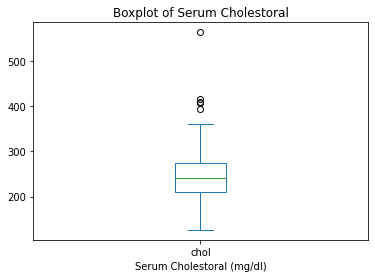

In [224]:
ax = df.chol.plot.box()
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Boxplot of Serum Cholestoral')
plt.show()

In [204]:
qu1 = df.chol.describe()['25%']
qu3 = df.chol.describe()['75%']
iqr = qu3 - qu1
variacion = iqr * 1.5
variacion
df.query(f'chol < ({qu1} - {variacion}) or chol > ({qu3} + {variacion})')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
48,65,0,3,140,417,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0
121,63,0,4,150,407,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4
152,67,0,3,115,564,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
173,62,0,4,140,394,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0
181,56,0,4,134,409,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,2


**Outliers**

Por medio del IQR y la regla del `1.5 * IQR` es posible determinar que existen valores atípicos o outliers.

##### Violin Plot

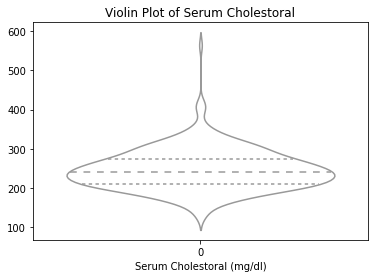

In [223]:
ax = sns.violinplot(df.chol, inner='quartile', color='white')
ax.set_xlabel('Serum Cholestoral (mg/dl)')
ax.set_title('Violin Plot of Serum Cholestoral')
plt.show()

In [230]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160,286,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120,229,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130,250,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130,204,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68,1,4,144,193,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57,1,4,130,131,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57,0,2,130,236,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### Fasting Blood Sugar

Esta variable puede tomar dos valores:

- 1: Si el nivel de Fasting Blood Sugar es mayor a 120 mg/dl
- 0: De lo contrario

In [235]:
df.query('fbs not in (0, 1)')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


No hay valores nulos, todos los valores se encuentran dentro del rango $\{0, 1\}$ para el nivel de glucemia de las personas

In [255]:
bar = df.groupby('fbs').agg(count = ('fbs', 'count'))
bar['prob'] = bar['count'] / bar['count'].sum()
bar

,count,prob
fbs,,
0,258,0.851485
1,45,0.148515


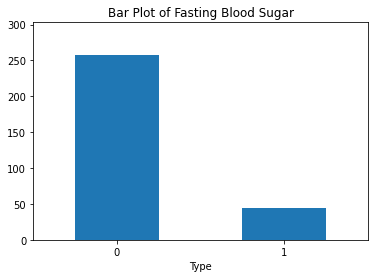

In [256]:
ax = bar['count'].plot.bar(rot=0, ylim=[0, 303], legend=False)
ax.set_title('Bar Plot of Fasting Blood Sugar')
ax.set_xlabel('Type')
plt.show()

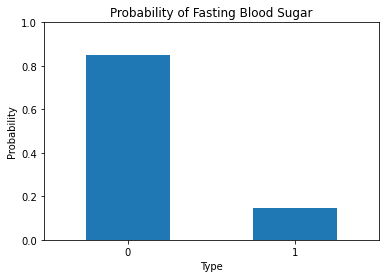

In [257]:
ax = bar['prob'].plot.bar(rot=0, ylim=[0, 1], legend=False)
ax.set_title('Probability of Fasting Blood Sugar')
ax.set_xlabel('Type')
ax.set_ylabel('Probability')
plt.show()

Los datos de glucemia no se encuentran uniformemente distribuidos.

El 85% de los datos pertenecen a personas con un nivel de glucemia menor a 120 mg/dl.

In [258]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160,286,0,2,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120,229,0,2,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130,250,0,0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130,204,0,2,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68,1,4,144,193,1,0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57,1,4,130,131,0,0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57,0,2,130,236,0,2,174.0,0.0,0.0,2.0,1.0,3.0,1
